###**Corrélation**

+ **La sélection de caractéristiques par corrélation évalue des sous-ensembles de caractéristiques sur la base de l'hypothèse suivante : "Les bons sous-ensembles de caractéristiques contiennent des caractéristiques fortement corrélées avec la cible, mais non corrélées entre elles".**

+ Références :

  + M. Hall 1999, Correlation-based Feature Selection for Machine Learning.

+ Senliol, Baris, et al. "Fast Correlation Based Filter (FCBF) with a different search strategy". Computer and Information Sciences.

+ Je vais démontrer comment sélectionner des caractéristiques basées sur la corrélation en utilisant 2 procédures :

  + La première est une fonction de force brute qui trouve des caractéristiques corrélées sans autre forme de procès.

  + La deuxième procédure trouve des groupes de caractéristiques corrélées, que nous pouvons ensuite explorer pour décider lesquelles nous gardons et lesquelles nous rejetons.

+ Souvent, plus de deux caractéristiques sont corrélées entre elles. Nous pouvons trouver des groupes de 3, 4 caractéristiques ou plus qui sont corrélées. En identifiant ces groupes, à l'aide de la procédure 2, nous pouvons ensuite sélectionner dans chaque groupe les caractéristiques que nous voulons conserver et celles que nous voulons éliminer.

+ Note

  + La méthode la plus utilisée pour déterminer la corrélation est la méthode de corrélation de Pearson, qui est celle que je vais réaliser dans ce cahier.

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [83]:
data = pd.read_csv('/content/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


+ En pratique, **la sélection des caractéristiques doit être effectuée après le prétraitement des données**. 

+ Dans l'idéal, toutes les variables catégorielles sont codées en nombres, puis vous pouvez évaluer si elles sont corrélées à d'autres caractéristiques.

+ Cet ensemble de données, pour des raisons de simplicité, ne contient que des variables numériques.

**Important**

+ Dans toutes les procédures de sélection de caractéristiques, il est bon de sélectionner les caractéristiques en examinant uniquement l'ensemble d'apprentissage. Ceci afin d'éviter l'overfit.



In [84]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [86]:
X_train.shape, X_test.shape

((16000, 370), (4000, 370))

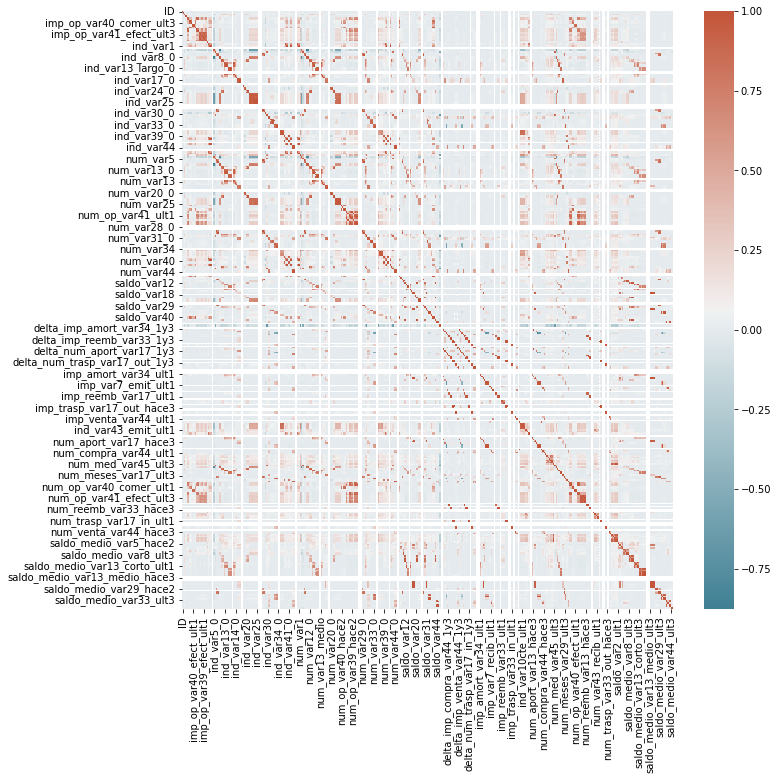

In [87]:
# Visualiser les caractéristiques corrélées :

# Je vais construire une matrice de corrélation, qui examine la 
# corrélation de toutes les caractéristiques (c'est-à-dire pour toutes les combinaisons possibles de caractéristiques).
# puis visualiser la matrice de corrélation à l'aide d'une carte thermique.

# la méthode de corrélation par défaut de pandas.corr est pearson
# Je l'inclus quand même pour la démo
corrmat = X_train.corr(method='pearson')

# nous pouvons créer une carte thermique avec le paquet seaborn
# et personnaliser les couleurs de la carte de chaleur de seaborn
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# quelques paramètres supplémentaires pour la figure
fig, ax = plt.subplots()
fig.set_size_inches(11,11)

# et maintenant tracer la matrice de corrélation
sns.heatmap(corrmat, cmap=cmap)

+ **Dans le graphique ci-dessus, les carrés orange foncé correspondent à des caractéristiques fortement corrélées (>0,8)**. 

+ **Les carrés bleu foncé correspondent à des caractéristiques négativement corrélées (<-0,8)**.

+ La diagonale représente la corrélation d'une caractéristique avec elle-même, la valeur est donc de 1.

Nous pouvons voir qu'il y a quelques caractéristiques qui sont fortement corrélées.

###**Diagrammes de dispersion de la corrélation**

In [88]:
# En regardant la carte thermique, nous voyons que var25 est fortement corrélée 
# avec d'autres dans l'ensemble de données

# avec ce code, nous pouvons obtenir les noms des autres variables
# et aussi imprimer le coefficient de corrélation entre var25 et 
# ces variables :

c = 0

# itérer sur chaque valeur de corrélation pour var_5 :
for i in corrmat.loc['imp_op_var40_comer_ult3'] :
    
    # si forte corrélation
    if i>0.8 :
        
        # imprimer le nom de la variable et le coefficient de corrélation
        print(corrmat.columns[c], i)
        
    c = c +1

imp_op_var40_comer_ult1 0.9081584511507798
imp_op_var40_comer_ult3 1.0
num_op_var40_comer_ult1 0.8148038736264613
num_op_var40_comer_ult3 0.8231511211949771


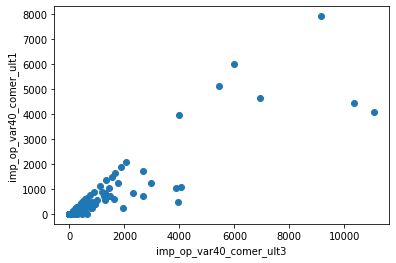

In [89]:
# now, let's plot the variables

plt.scatter(X_train['imp_op_var40_comer_ult3'], X_train['imp_op_var40_comer_ult1'])
plt.ylabel('imp_op_var40_comer_ult1')
plt.xlabel('imp_op_var40_comer_ult3')
plt.show()

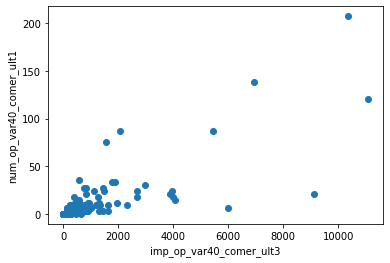

In [90]:
# now, let's plot the variables

plt.scatter(X_train['imp_op_var40_comer_ult3'], X_train['num_op_var40_comer_ult1'])
plt.ylabel('num_op_var40_comer_ult1')
plt.xlabel('imp_op_var40_comer_ult3')
plt.show()

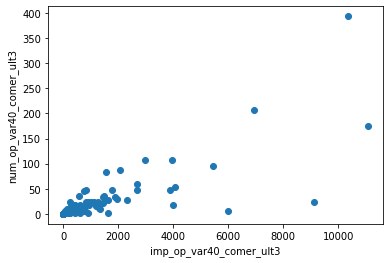

In [91]:
# now, let's plot the variables

plt.scatter(X_train['imp_op_var40_comer_ult3'], X_train['num_op_var40_comer_ult3'])
plt.ylabel('num_op_var40_comer_ult3')
plt.xlabel('imp_op_var40_comer_ult3')
plt.show()

+ Nous voyons que la corrélation de la deuxième paire de variables n'est pas tout à fait linéaire.

+ Ensuite, identifions une paire de variables corrélées négativement :

In [92]:
corrmat.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=370)

In [44]:
# En regardant la carte thermique, nous voyons que var25 est fortement corrélée 
# avec d'autres dans l'ensemble de données

# avec ce code, nous pouvons obtenir les noms des autres variables
# et aussi imprimer le coefficient de corrélation entre var25 et 
# ces variables :

c = 0

# itérer sur chaque valeur de corrélation pour var_5 :
for i in corrmat.loc['saldo_medio_var44_ult3'] :
  
  # si forte corrélation
  if i<-0.8 :

      # imprimer le nom de la variable et le coefficient de corrélation
      print(corrmat.columns[c], i)
        
  c = c +1


+ Plus la valeur d'une variable est élevée, plus la valeur de l'autre variable est faible.

+ Maintenant, procédons à la sélection des caractéristiques

###**Suppression des corrélations**
####**Approche par la force brute**

In [93]:
# Avec la fonction suivante, nous pouvons sélectionner des caractéristiques hautement corrélées.
# Elle supprimera la première caractéristique qui est corrélée avec quoi que ce soit d'autre.
# sans autre précision.

def correlation(dataset, threshold) :
    
    # créer un ensemble où je stockerai les noms des colonnes corrélées
    col_corr = set()
    
    # crée la matrice de corrélation
    corr_matrix = dataset.corr()
    
    # pour chaque caractéristique de l'ensemble de données (colonnes de la matrice de corrélation)
    for i in range(len(corr_matrix.columns)) :
        
        # vérifier avec d'autres caractéristiques
        for j in range(i) :
            
            # si la corrélation est supérieure à un certain seuil
            if abs(corr_matrix.iloc[i, j]) > threshold : # nous sommes intéressés par la valeur absolue du coefficient
                
                # imprimer la corrélation, et les variables examinées
                # Gardez à l'esprit que les colonnes et les lignes de la trame de données sont identiques.
                # donc nous pouvons identifier les caractéristiques examinées en cherchant i,j
                # dans les noms de colonnes
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # Obtenez le nom de la caractéristique corrélée
                colname = corr_matrix.columns[i]
                
                # et l'ajouter à notre ensemble corrélé
                col_corr.add(colname)

In [94]:
corr_features = correlation(X_train, 0.8)
corr_features

0.888789434671467 imp_op_var39_comer_ult3 imp_op_var39_comer_ult1
0.9081584511507798 imp_op_var40_comer_ult3 imp_op_var40_comer_ult1
0.9882559621549161 imp_op_var40_efect_ult3 imp_op_var40_efect_ult1
0.8052647862974496 imp_op_var40_ult1 imp_op_var40_comer_ult1
0.9384087537757488 imp_op_var41_comer_ult1 imp_op_var39_comer_ult1
0.8248929578527747 imp_op_var41_comer_ult1 imp_op_var39_comer_ult3
0.8389530248980445 imp_op_var41_comer_ult3 imp_op_var39_comer_ult1
0.9436219842513776 imp_op_var41_comer_ult3 imp_op_var39_comer_ult3
0.8816729964574016 imp_op_var41_comer_ult3 imp_op_var41_comer_ult1
0.8888177960636919 imp_op_var41_efect_ult3 imp_op_var41_efect_ult1
0.8818421088165029 imp_op_var41_ult1 imp_op_var41_efect_ult1
0.8185683320388943 imp_op_var41_ult1 imp_op_var41_efect_ult3
0.9942239235472465 imp_op_var39_efect_ult1 imp_op_var41_efect_ult1
0.8820370418747906 imp_op_var39_efect_ult1 imp_op_var41_efect_ult3
0.8754431800295537 imp_op_var39_efect_ult1 imp_op_var41_ult1
0.8886688194707709 i

In [95]:
print(type(corr_features))

<class 'NoneType'>


In [96]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

+ **Remarque** : si le code de la cellule 50 est difficile à comprendre, exécutez le code ligne par ligne (vous devrez entrer manuellement certaines des valeurs de i) ou ajoutez des instructions d'impression dans la boucle pour imprimer les sorties intermédiaires.

In [97]:
corr_features = get_correlation(X_train, 0.8)
corr_features

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_hace3',
 'imp_aport_var33_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_reemb_var17_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var12',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo',
 'ind_var17',
 'ind_var20',
 'ind_var24',
 'ind_var24_0',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var

In [98]:
len(corr_features)

189

+ Nous pouvons voir que 189 caractéristiques sont fortement corrélées avec d'autres caractéristiques dans l'ensemble de formation.

+ Il est très probable qu'en supprimant ces caractéristiques corrélées, les performances de vos modèles d'apprentissage automatique ne diminueront que très peu, voire pas du tout. 

+ Nous pouvons aller de l'avant et supprimer les caractéristiques comme nous l'avons fait dans les cours précédents.

In [99]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((16000, 181), (4000, 181))

+ En supprimant les colonnes corrélées, nous avons réduit l'espace des caractéristiques de 300 colonnes numériques à 189.

###**Deuxième approche**

+ La deuxième approche consiste à identifier des groupes de caractéristiques hautement corrélées. 

+ Ensuite, nous pouvons effectuer des recherches plus approfondies au sein de ces groupes pour décider quelle caractéristique nous conservons et laquelle nous supprimons.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((16000, 370), (4000, 370))

In [101]:
# construire un cadre de données avec la corrélation entre les caractéristiques
# N'oubliez pas que la valeur absolue du coefficient de corrélation
# est importante et non le signe

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,ind_var29,num_var6,1.0
1,num_var29,ind_var29,1.0
2,num_var29,ind_var6,1.0
3,ind_var6,num_var6,1.0
4,num_var6,ind_var6,1.0


In [102]:
# trouver des groupes de caractéristiques corrélées

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique() :
    
    if feature not in grouped_feature_ls :

        # trouver toutes les caractéristiques corrélées à une seule caractéristique
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # ajouter le bloc de caractéristiques à la liste
        correlated_groups.append(correlated_block)

print('on trouve {} groupes corrélés'.format(len(correlated_groups)))
print('sur {} total des caractéristiques'.format(X_train.shape[1]))

on trouve 69 groupes corrélés
sur 370 total des caractéristiques


In [103]:
# maintenant nous pouvons imprimer chaque groupe. Nous voyons que certains groupes contiennent
# seulement 2 caractéristiques corrélées, d'autres groupes présentent plusieurs caractéristiques 
# qui sont corrélées entre elles.

for group in correlated_groups :
    display(group)
    print()

,feature1,feature2,corr
0,ind_var29,num_var6,1.000000
6,ind_var29,num_var29,1.000000
222,ind_var29,saldo_var29,0.972432
227,ind_var29,saldo_var6,0.972432
676,ind_var29,saldo_medio_var29_ult3,0.860499
734,ind_var29,saldo_medio_var29_ult1,0.844975


,feature1,feature2,corr
3,ind_var6,num_var6,1.000000
7,ind_var6,num_var29,1.000000
225,ind_var6,saldo_var6,0.972432
228,ind_var6,saldo_var29,0.972432
677,ind_var6,saldo_medio_var29_ult3,0.860499
737,ind_var6,saldo_medio_var29_ult1,0.844975


,feature1,feature2,corr
8,delta_num_compra_var44_1y3,delta_imp_compra_var44_1y3,1.0


,feature1,feature2,corr
10,delta_num_venta_var44_1y3,delta_imp_venta_var44_1y3,1.0


,feature1,feature2,corr
12,num_venta_var44_hace3,imp_venta_var44_hace3,1.0


,feature1,feature2,corr
14,num_aport_var33_ult1,imp_aport_var33_ult1,1.000000
46,num_aport_var33_ult1,imp_aport_var33_hace3,0.999929
245,num_aport_var33_ult1,num_aport_var33_hace3,0.970142


,feature1,feature2,corr
16,delta_num_trasp_var17_in_1y3,num_trasp_var17_in_ult1,1.0
38,delta_num_trasp_var17_in_1y3,imp_trasp_var17_in_ult1,1.0


,feature1,feature2,corr
17,delta_imp_trasp_var17_in_1y3,num_trasp_var17_in_ult1,1.0
37,delta_imp_trasp_var17_in_1y3,imp_trasp_var17_in_ult1,1.0


,feature1,feature2,corr
20,delta_num_reemb_var17_1y3,imp_reemb_var17_ult1,1.0
26,delta_num_reemb_var17_1y3,num_reemb_var17_ult1,1.0


,feature1,feature2,corr
21,delta_imp_reemb_var17_1y3,imp_reemb_var17_ult1,1.0
25,delta_imp_reemb_var17_1y3,num_reemb_var17_ult1,1.0


,feature1,feature2,corr
28,ind_var6_0,num_var6_0,1.000000
30,ind_var6_0,num_var29_0,1.000000
776,ind_var6_0,num_meses_var29_ult3,0.833301
886,ind_var6_0,saldo_medio_var29_ult3,0.807014


,feature1,feature2,corr
32,ind_var29_0,num_var29_0,1.000000
35,ind_var29_0,num_var6_0,1.000000
775,ind_var29_0,num_meses_var29_ult3,0.833301
887,ind_var29_0,saldo_medio_var29_ult3,0.807014


,feature1,feature2,corr
40,num_var14,ind_var14,1.0


,feature1,feature2,corr
42,imp_aport_var17_hace3,saldo_medio_var17_hace3,0.999997
61,imp_aport_var17_hace3,saldo_medio_var17_hace2,0.999778
82,imp_aport_var17_hace3,saldo_medio_var17_ult1,0.997052
93,imp_aport_var17_hace3,saldo_medio_var17_ult3,0.996772
100,imp_aport_var17_hace3,saldo_var17,0.996424
113,imp_aport_var17_hace3,saldo_var31,0.993307
331,imp_aport_var17_hace3,num_aport_var17_hace3,0.944314


,feature1,feature2,corr
44,saldo_medio_var33_ult1,saldo_var33,0.999945
73,saldo_medio_var33_ult1,saldo_medio_var33_ult3,0.998497
360,saldo_medio_var33_ult1,saldo_medio_var33_hace2,0.938668


,feature1,feature2,corr
50,saldo_medio_var33_hace3,imp_aport_var33_hace3,0.999929
247,saldo_medio_var33_hace3,num_aport_var33_hace3,0.970142


,feature1,feature2,corr
58,num_op_var39_hace3,num_op_var41_hace3,0.999859


,feature1,feature2,corr
64,saldo_var24,saldo_var12,0.999478
122,saldo_var24,saldo_medio_var12_ult1,0.992448
149,saldo_var24,saldo_var42,0.986792
183,saldo_var24,saldo_medio_var12_ult3,0.982179
384,saldo_var24,saldo_medio_var12_hace2,0.933718
770,saldo_var24,saldo_var30,0.836023


,feature1,feature2,corr
66,ind_var24_0,num_var24_0,0.999265
306,ind_var24_0,ind_var24,0.947113
308,ind_var24_0,num_var24,0.947113
631,ind_var24_0,ind_var12,0.868386
642,ind_var24_0,num_var12,0.865097
745,ind_var24_0,num_meses_var12_ult3,0.844226


,feature1,feature2,corr
70,num_op_var39_efect_ult3,num_op_var41_efect_ult3,0.998753
488,num_op_var39_efect_ult3,num_op_var41_efect_ult1,0.905699
496,num_op_var39_efect_ult3,num_op_var39_efect_ult1,0.904341


,feature1,feature2,corr
74,num_var45_ult3,num_med_var45_ult3,0.997718
460,num_var45_ult3,num_var45_hace2,0.913134
616,num_var45_ult3,num_var45_ult1,0.871499


,feature1,feature2,corr
96,imp_op_var41_efect_ult3,imp_op_var39_efect_ult3,0.996739
534,imp_op_var41_efect_ult3,imp_op_var41_efect_ult1,0.888818
567,imp_op_var41_efect_ult3,imp_op_var39_efect_ult1,0.882037
834,imp_op_var41_efect_ult3,imp_op_var41_ult1,0.818568
870,imp_op_var41_efect_ult3,imp_op_var39_ult1,0.809811


,feature1,feature2,corr
110,saldo_medio_var44_ult1,saldo_medio_var44_ult3,0.993536
150,saldo_medio_var44_ult1,saldo_var44,0.986744
378,saldo_medio_var44_ult1,saldo_medio_var44_hace2,0.935317


,feature1,feature2,corr
116,ind_var13_corto_0,num_var13_corto_0,0.993186
153,ind_var13_corto_0,ind_var13_corto,0.986371
154,ind_var13_corto_0,num_var13_corto,0.986371
255,ind_var13_corto_0,num_meses_var13_corto_ult3,0.964067
509,ind_var13_corto_0,ind_var13_0,0.901032
533,ind_var13_corto_0,ind_var13,0.889321
711,ind_var13_corto_0,num_var13,0.851022
758,ind_var13_corto_0,num_var13_0,0.841471


,feature1,feature2,corr
118,ind_var5,num_var5,0.992882
490,ind_var5,num_meses_var5_ult3,0.905512
731,ind_var5,ind_var30,0.845657
793,ind_var5,num_var42,0.827368


,feature1,feature2,corr
124,ind_var41_0,ind_var39_0,0.990593
469,ind_var41_0,num_var41_0,0.911272
579,ind_var41_0,num_var39_0,0.880435
908,ind_var41_0,num_meses_var39_vig_ult3,0.803228


,feature1,feature2,corr
126,ind_var13_largo_0,ind_var13_largo,0.990244
431,ind_var13_largo_0,num_var13_largo,0.920266
453,ind_var13_largo_0,num_var13_largo_0,0.915813
814,ind_var13_largo_0,num_meses_var13_largo_ult3,0.823506


,feature1,feature2,corr
128,num_op_var41_hace2,num_op_var39_hace2,0.989793
608,num_op_var41_hace2,num_op_var41_ult3,0.874240
690,num_op_var41_hace2,num_op_var39_ult3,0.858529
910,num_op_var41_hace2,num_op_var41_comer_ult3,0.802753


,feature1,feature2,corr
130,saldo_var13_corto,saldo_medio_var13_corto_ult1,0.989341
188,saldo_var13_corto,saldo_medio_var13_corto_ult3,0.980951
482,saldo_var13_corto,saldo_medio_var13_corto_hace2,0.907987
546,saldo_var13_corto,saldo_var13,0.887721


,feature1,feature2,corr
138,imp_op_var40_efect_ult3,imp_op_var40_efect_ult1,0.988256
552,imp_op_var40_efect_ult3,num_op_var40_efect_ult3,0.886955
584,imp_op_var40_efect_ult3,num_op_var40_efect_ult1,0.878045


,feature1,feature2,corr
140,num_var44_0,ind_var44_0,0.987429
205,num_var44_0,ind_var44,0.974341
206,num_var44_0,num_var44,0.974341
340,num_var44_0,num_meses_var44_ult3,0.941836


,feature1,feature2,corr
144,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,0.987304
258,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_hace2,0.962657


,feature1,feature2,corr
146,saldo_var25,saldo_var26,0.987013


,feature1,feature2,corr
160,num_var35,num_var4,0.985951


,feature1,feature2,corr
162,ind_var12_0,num_var12_0,0.985875
621,ind_var12_0,num_var42_0,0.870703
820,ind_var12_0,ind_var12,0.821350
844,ind_var12_0,num_var12,0.816419


,feature1,feature2,corr
166,num_op_var40_ult1,num_op_var40_ult3,0.984751
634,num_op_var40_ult1,num_op_var40_comer_ult1,0.866725
720,num_op_var40_ult1,num_op_var40_comer_ult3,0.849994
818,num_op_var40_ult1,num_op_var40_hace2,0.822042


,feature1,feature2,corr
168,ind_var26,ind_var25,0.984077
171,ind_var26,ind_var25_0,0.984077
367,ind_var26,ind_var26_cte,0.937629
416,ind_var26,ind_var25_cte,0.925323
656,ind_var26,num_var26,0.862850
662,ind_var26,num_var26_0,0.862850
712,ind_var26,num_var25_0,0.850893
714,ind_var26,num_var25,0.850893


,feature1,feature2,corr
172,ind_var26_0,ind_var25,0.984077
175,ind_var26_0,ind_var25_0,0.984077
368,ind_var26_0,ind_var26_cte,0.937629
415,ind_var26_0,ind_var25_cte,0.925323
661,ind_var26_0,num_var26,0.862850
663,ind_var26_0,num_var26_0,0.862850
716,ind_var26_0,num_var25,0.850893
719,ind_var26_0,num_var25_0,0.850893


,feature1,feature2,corr
178,saldo_var8,saldo_medio_var8_ult1,0.983156
213,saldo_var8,saldo_medio_var8_ult3,0.972468


,feature1,feature2,corr
202,ind_var10cte_ult1,ind_var9_cte_ult1,0.975002
390,ind_var10cte_ult1,ind_var10_ult1,0.930635
495,ind_var10cte_ult1,ind_var9_ult1,0.904702
610,ind_var10cte_ult1,ind_var37_cte,0.874083
799,ind_var10cte_ult1,ind_var37,0.825529
801,ind_var10cte_ult1,ind_var37_0,0.825529


,feature1,feature2,corr
208,num_op_var39_ult1,num_op_var41_ult1,0.973140
358,num_op_var39_ult1,num_op_var39_comer_ult1,0.938960
371,num_op_var39_ult1,num_op_var39_ult3,0.936080
432,num_op_var39_ult1,num_op_var41_comer_ult1,0.919405
474,num_op_var39_ult1,num_op_var41_ult3,0.910385
693,num_op_var39_ult1,num_op_var39_comer_ult3,0.858484
764,num_op_var39_ult1,num_op_var41_comer_ult3,0.839378


,feature1,feature2,corr
260,num_var33,num_meses_var33_ult3,0.962423
337,num_var33,ind_var33,0.942789
527,num_var33,num_var33_0,0.894392
655,num_var33,saldo_medio_var33_hace2,0.864431


,feature1,feature2,corr
268,delta_imp_aport_var13_1y3,num_aport_var13_ult1,0.959468


,feature1,feature2,corr
270,delta_num_aport_var13_1y3,num_aport_var13_ult1,0.959468


,feature1,feature2,corr
278,delta_imp_aport_var33_1y3,delta_num_aport_var33_1y3,0.957928
760,delta_imp_aport_var33_1y3,num_aport_var33_hace3,0.841299


,feature1,feature2,corr
290,ind_var31,ind_var31_0,0.951792
831,ind_var31,num_var31,0.820499


,feature1,feature2,corr
298,imp_op_var40_ult1,saldo_var40,0.948845
301,imp_op_var40_ult1,saldo_var1,0.948845
898,imp_op_var40_ult1,imp_op_var40_comer_ult1,0.805265


,feature1,feature2,corr
310,ind_var33_0,num_var33_0,0.946702
843,ind_var33_0,ind_var33,0.816420


,feature1,feature2,corr
318,num_var22_ult3,num_med_var22_ult3,0.945288


,feature1,feature2,corr
320,saldo_medio_var44_hace3,imp_compra_var44_hace3,0.944812
915,saldo_medio_var44_hace3,num_compra_var44_hace3,0.800327


,feature1,feature2,corr
334,imp_op_var41_comer_ult3,imp_op_var39_comer_ult3,0.943622
575,imp_op_var41_comer_ult3,imp_op_var41_comer_ult1,0.881673
766,imp_op_var41_comer_ult3,imp_op_var39_comer_ult1,0.838953
882,imp_op_var41_comer_ult3,num_op_var41_comer_ult3,0.808111


,feature1,feature2,corr
372,num_var37_med_ult2,num_var37_0,0.935867
374,num_var37_med_ult2,num_var37,0.935867


,feature1,feature2,corr
376,ind_var17,ind_var17_0,0.935327
409,ind_var17,num_meses_var17_ult3,0.927012
841,ind_var17,num_var17_0,0.816682
846,ind_var17,num_var17,0.814978


,feature1,feature2,corr
394,saldo_var32,num_var32,0.928898
395,saldo_var32,num_var32_0,0.928898
808,saldo_var32,ind_var32,0.824869
809,saldo_var32,ind_var32_0,0.824869


,feature1,feature2,corr
400,num_var8,ind_var8_0,0.927683
404,num_var8,num_var8_0,0.927683
442,num_var8,num_meses_var8_ult3,0.917206
851,num_var8,ind_var5_0,0.814546
894,num_var8,ind_var26_cte,0.806814


,feature1,feature2,corr
403,ind_var8,num_var8_0,0.927683
406,ind_var8,ind_var8_0,0.927683
445,ind_var8,num_meses_var8_ult3,0.917206
853,ind_var8,ind_var5_0,0.814546
892,ind_var8,ind_var26_cte,0.806814


,feature1,feature2,corr
418,num_var31_0,num_var31,0.924000
637,num_var31_0,num_var17_0,0.866430
865,num_var31_0,ind_var31_0,0.811395


,feature1,feature2,corr
436,num_venta_var44_ult1,num_compra_var44_ult1,0.918533
913,num_venta_var44_ult1,imp_venta_var44_ult1,0.800425


,feature1,feature2,corr
451,num_var5_0,ind_var5_0,0.916137
905,num_var5_0,ind_var8_0,0.803859
907,num_var5_0,num_var8_0,0.803859


,feature1,feature2,corr
480,imp_op_var40_comer_ult3,imp_op_var40_comer_ult1,0.908158
817,imp_op_var40_comer_ult3,num_op_var40_comer_ult3,0.823151
848,imp_op_var40_comer_ult3,num_op_var40_comer_ult1,0.814804


,feature1,feature2,corr
498,num_var7_recib_ult1,ind_var7_recib_ult1,0.904157


,feature1,feature2,corr
502,num_var30,num_var42,0.903641
581,num_var30,ind_var30,0.879907


,feature1,feature2,corr
518,imp_reemb_var13_ult1,delta_num_reemb_var13_1y3,0.89633
520,imp_reemb_var13_ult1,delta_imp_reemb_var13_1y3,0.89633
523,imp_reemb_var13_ult1,num_reemb_var13_ult1,0.89633


,feature1,feature2,corr
570,ind_var32_cte,ind_var32,0.881807
572,ind_var32_cte,ind_var32_0,0.881807


,feature1,feature2,corr
702,num_var20_0,num_var20,0.851384
709,num_var20_0,ind_var20,0.851384


,feature1,feature2,corr
704,ind_var20_0,num_var20,0.851384
707,ind_var20_0,ind_var20,0.851384


,feature1,feature2,corr
782,saldo_var5,saldo_medio_var5_ult1,0.831461


,feature1,feature2,corr
784,num_var30_0,num_var42_0,0.830082


,feature1,feature2,corr
880,saldo_medio_var8_hace2,saldo_medio_var8_ult1,0.808113


In [104]:
# nous pouvons maintenant étudier d'autres caractéristiques au sein d'un même groupe.
# sélectionnons par exemple le groupe 1

group = correlated_groups[1]
group

,feature1,feature2,corr
3,ind_var6,num_var6,1.000000
7,ind_var6,num_var29,1.000000
225,ind_var6,saldo_var6,0.972432
228,ind_var6,saldo_var29,0.972432
677,ind_var6,saldo_medio_var29_ult3,0.860499
737,ind_var6,saldo_medio_var29_ult1,0.844975


+ Dans ce groupe, plusieurs caractéristiques sont fortement corrélées. 

+ Lesquelles devons-nous conserver et celles que nous devons supprimer ?

+ Un critère pour sélectionner les caractéristiques à utiliser dans ce groupe serait d'utiliser celles qui ont le moins de données manquantes.

+ Notre jeu de données ne contient aucune valeur manquante, ce n'est donc pas une option.

+ Mais gardez cela à l'esprit lorsque vous travaillez avec vos propres ensembles de données.

+ Nous pourrions également construire un algorithme d'apprentissage automatique en utilisant toutes les caractéristiques de la liste ci-dessus, et sélectionner la plus prédictive.

In [105]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['num_var6']

# train a random forest 
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

In [135]:
# obtenir l'importance de la caractéristique attribuée par le 
# modèle de forêt aléatoire (plus d'informations à ce sujet dans les prochains cours)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# trie les caractéristiques par importance, la plus importante en premier
importance.sort_values(by='importance', ascending=False)

,feature,importance
4,saldo_medio_var29_ult3,0.310910
5,saldo_medio_var29_ult1,0.273526
6,num_var6,0.091310
3,saldo_var29,0.084129
2,saldo_var6,0.083773
0,num_var6,0.078517
1,num_var29,0.077834


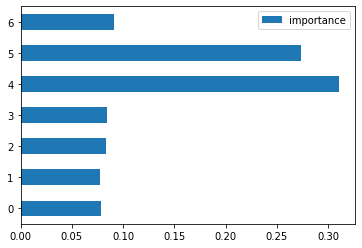

In [140]:
importance.plot(kind="barh")

In [123]:
X_train_uncorr = X_train.drop(labels= corr_features, axis = 1)
X_test_uncorr = X_test.drop(labels = corr_features, axis = 1)

In [124]:
features_to_consider = set(importance['feature'])

In [125]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [126]:
features_to_discard = list(features_to_discard)

In [127]:
X_train_grouped_uncorr = X_train.drop(labels = features_to_discard, axis = 1)
X_train_grouped_uncorr.shape

(16000, 187)

In [128]:
X_test_grouped_uncorr = X_test.drop(labels=features_to_discard, axis = 1)
X_test_grouped_uncorr.shape

(4000, 187)

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [131]:
run_randomForest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

Accuracy on test set: 
0.958


In [132]:
#%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585


In [133]:
#%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.959


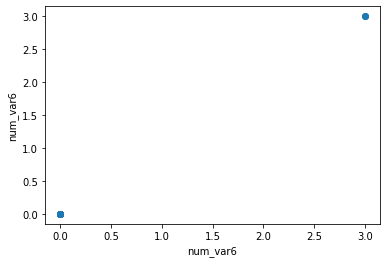

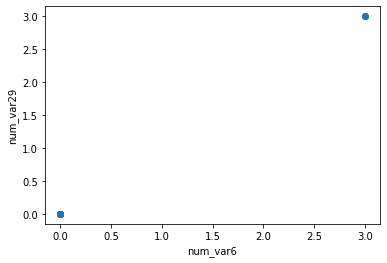

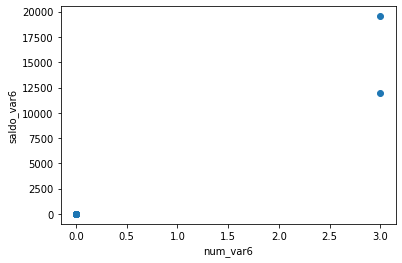

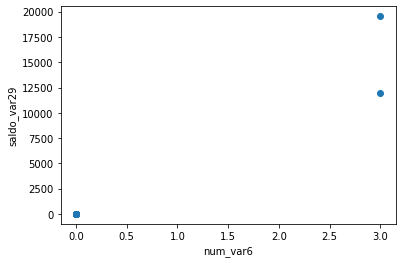

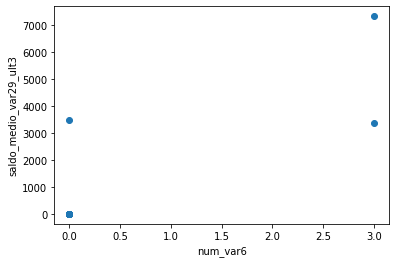

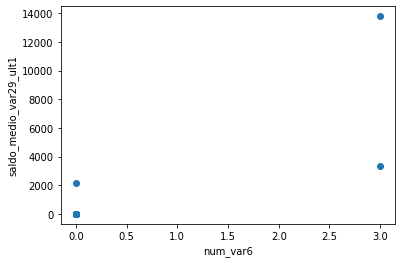

In [141]:
# BONUS:
# let's plot the correlation of the features in the correlated group from the
# previous cell

for feature in group['feature2']:
    plt.scatter(X_train['num_var6'], X_train[feature])
    plt.xlabel('num_var6')
    plt.ylabel(feature)
    plt.show()

##**Méthodes de base plus pipeline de corrélation**

+ Dans ce cahier, **nous allons sélectionner des caractéristiques en utilisant une combinaison de méthodes constantes, quasi-constantes et de corrélation.**

+ Enfin, nous comparerons les performances des modèles d'apprentissage automatique construits avec les différents sous-ensembles de caractéristiques.

In [142]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [143]:
data = pd.read_csv('/content/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((16000, 370), (4000, 370))

In [147]:
# Je garde une copie de l'ensemble des données avec toutes les variables
# pour mesurer la performance des modèles d'apprentissage automatique
# à la fin du carnet de notes

X_train_original = X_train.copy()
X_test_original = X_test.copy()

###**Remove constant features**

In [148]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((16000, 291), (4000, 291))

###**Suppression des caractéristiques quasi-constantes**
+ Nous pouvons également utiliser le code ci-dessous pour supprimer complètement les caractéristiques **constantes et quasi-constantes**.

In [149]:
# supprimer les caractéristiques quasi-constantes
sel = VarianceThreshold(
    threshold=0.01) # 0.1 indique approximativement 99% des observations

sel.fit(X_train) # l'ajustement trouve les caractéristiques à faible variance

sum(sel.get_support()) # combien de caractéristiques non quasi-constantes ?

245

In [150]:
features_to_keep = X_train.columns[sel.get_support()]
features_to_keep

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=245)

In [151]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((16000, 245), (4000, 245))

In [152]:
# les transformations de sklearn mènent à des tableaux numpy
# ici je retransforme les tableaux en dataframes
# s'il vous plaît soyez attentif à ce que les colonnes soient assignées
# correctement

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [154]:
X_test.head(n=3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,19459.0,2.0,52.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74677.380000
1,38602.0,2.0,39.0,570.0,1195.32,1855.32,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117036.240000
2,11052.0,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


###**Supprimer les fonctionnalités dupliquées**

In [155]:
# vérifier les caractéristiques dupliquées dans l'ensemble d'apprentissage
duplicated_feat = []
for i in range(0, len(X_train.columns)) :
    if i % 10 == 0 : # ceci m'aide à comprendre comment la boucle se déroule
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1 :]:
        if X_train[col_1].equals(X_train[col_2]) :
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


19

In [156]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((16000, 227), (4000, 227))

In [157]:
# Je garde une copie de l'ensemble des données sauf les variables constantes et dupliquées.
# pour mesurer la performance des modèles d'apprentissage automatique
# à la fin du carnet de notes

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

###**Supprimer les caractéristiques corrélées**

In [158]:
# trouver et supprimer les caractéristiques corrélées

def correlation(dataset, threshold) :
    col_corr = set() # Ensemble de tous les noms des colonnes corrélées
    
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)) :
    
        for j in range(i) :
            if abs(corr_matrix.iloc[i, j]) > threshold : # nous sommes intéressés par la valeur absolue du coefficient
                colname = corr_matrix.columns[i] # obtention du nom de la colonne
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('caractéristiques corrélées : ', len(set(corr_features)) )

caractéristiques corrélées :  131


In [159]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((16000, 96), (4000, 96))

###**Comparer les performances des modèles d'apprentissage automatique**

In [160]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [161]:
# original dataset (all variables)
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8069327987972938
Test set
Random Forests roc-auc: 0.7315123490840717


In [162]:
# filter methods - basic
run_randomForests(X_train_basic_filter,
                  X_test_basic_filter,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8113706339263342
Test set
Random Forests roc-auc: 0.7407339898406058


In [163]:
# filter methods - correlation
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8138635429716863
Test set
Random Forests roc-auc: 0.7446552857149711


In [164]:
# create a function to build logistic regression and compare performance in train and test set

def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [165]:
# original
# for logistic regression features need to be in the same scale

# original
scaler = StandardScaler().fit(X_train_original)

run_logistic(scaler.transform(X_train_original),
             scaler.transform(X_test_original), y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8145820095214231
Test set
Logistic Regression roc-auc: 0.7551112752645774


In [166]:
# filter methods - basic
scaler = StandardScaler().fit(X_train_basic_filter)

run_logistic(scaler.transform(X_train_basic_filter),
             scaler.transform(X_test_basic_filter),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8139325482335256
Test set
Logistic Regression roc-auc: 0.7531350380777415


In [167]:
# filter methods - correlation
scaler = StandardScaler().fit(X_train)

run_logistic(scaler.transform(X_train),
             scaler.transform(X_test),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8017613630669007
Test set
Logistic Regression roc-auc: 0.756056223628186


###**Corrélation avec Feature-engine**

+ **La classe DropCorrelatedFeatures** de Feature-engine effectue un travail similaire à l'approche par force brute que nous avons décrite précédemment.

+ **La SmartCorrelationSelection** nous permet de sélectionner une caractéristique dans chaque groupe corrélé en fonction des performances du modèle, du nombre de valeurs manquantes, de la cardinalité ou de la variance.

In [170]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [172]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate

from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

In [173]:
data = pd.read_csv('/content/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((16000, 370), (4000, 370))

###**Suppression des corrélations**
####**Approche par la force brute**

In [175]:
# set up the selector

sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson',
    missing_values='ignore'
)


# find correlated features

sel.fit(X_train)

DropCorrelatedFeatures()

In [176]:
# each set contains a group of correlated features

sel.correlated_feature_sets_

[{'imp_op_var39_comer_ult1',
  'imp_op_var39_comer_ult3',
  'imp_op_var41_comer_ult1',
  'imp_op_var41_comer_ult3'},
 {'imp_op_var40_comer_ult1',
  'imp_op_var40_comer_ult3',
  'imp_op_var40_ult1',
  'saldo_var1',
  'saldo_var40'},
 {'imp_op_var40_efect_ult1',
  'imp_op_var40_efect_ult3',
  'num_op_var40_efect_ult1',
  'num_op_var40_efect_ult3'},
 {'imp_op_var39_efect_ult1',
  'imp_op_var39_efect_ult3',
  'imp_op_var39_ult1',
  'imp_op_var41_efect_ult1',
  'imp_op_var41_efect_ult3',
  'imp_op_var41_ult1'},
 {'ind_var1_0', 'ind_var40_0', 'num_var1_0', 'num_var40_0'},
 {'ind_var1', 'ind_var39', 'ind_var40', 'num_var1', 'num_var39', 'num_var40'},
 {'ind_var5_0',
  'ind_var8',
  'ind_var8_0',
  'num_var5_0',
  'num_var8',
  'num_var8_0'},
 {'ind_var30', 'ind_var5', 'num_meses_var5_ult3', 'num_var42', 'num_var5'},
 {'ind_var29_0',
  'ind_var6_0',
  'num_meses_var29_ult3',
  'num_var29_0',
  'num_var6_0',
  'saldo_medio_var29_ult3'},
 {'ind_var29',
  'ind_var6',
  'num_var29',
  'num_var6',


In [177]:
# le transformateur sélectionne 1 caractéristique dans chaque groupe.
# le reste sera supprimé et peut être trouvé dans cet attribut

len(sel.features_to_drop_)

181

In [178]:
# drop correlated features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((16000, 189), (4000, 189))

###**SmartCorrelationSelection**
####**Performance du modèle**
+ Nous conserverons une caractéristique de chaque groupe de corrélation en fonction des performances d'une forêt aléatoire.

In [184]:
data = pd.read_csv('/content/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((16000, 370), (4000, 370))

In [186]:
# random forest
rf = RandomForestClassifier(
    n_estimators=10,
    random_state=20,
    n_jobs=4,
)

# correlation selector
sel = SmartCorrelatedSelection(
    variables=None, # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=rf,
    scoring="roc_auc",
    cv=3,
)

# this may take a while, because we are training
# a random forest per correlation group

sel.fit(X_train, y_train)

SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                          n_jobs=4,
                                                          random_state=20),
                         missing_values='raise',
                         selection_method='model_performance')

In [187]:
# groups of correlated features

sel.correlated_feature_sets_

[{'imp_op_var39_comer_ult1',
  'imp_op_var39_comer_ult3',
  'imp_op_var41_comer_ult1',
  'imp_op_var41_comer_ult3'},
 {'imp_op_var40_comer_ult1',
  'imp_op_var40_comer_ult3',
  'imp_op_var40_ult1',
  'saldo_var1',
  'saldo_var40'},
 {'imp_op_var40_efect_ult1',
  'imp_op_var40_efect_ult3',
  'num_op_var40_efect_ult1',
  'num_op_var40_efect_ult3'},
 {'imp_op_var39_efect_ult1',
  'imp_op_var39_efect_ult3',
  'imp_op_var39_ult1',
  'imp_op_var41_efect_ult1',
  'imp_op_var41_efect_ult3',
  'imp_op_var41_ult1'},
 {'ind_var1_0', 'ind_var40_0', 'num_var1_0', 'num_var40_0'},
 {'ind_var1', 'ind_var39', 'ind_var40', 'num_var1', 'num_var39', 'num_var40'},
 {'ind_var5_0',
  'ind_var8',
  'ind_var8_0',
  'num_var5_0',
  'num_var8',
  'num_var8_0'},
 {'ind_var30', 'ind_var5', 'num_meses_var5_ult3', 'num_var42', 'num_var5'},
 {'ind_var29_0',
  'ind_var6_0',
  'num_meses_var29_ult3',
  'num_var29_0',
  'num_var6_0',
  'saldo_medio_var29_ult3'},
 {'ind_var29',
  'ind_var6',
  'num_var29',
  'num_var6',


In [192]:
# examinons les performances d'une forêt aléatoire basée sur
# chaque caractéristique du second groupe, pour comprendre
# ce que fait le transformateur

# Sélection du second groupe de caractéristiques corrélées
group = sel.correlated_feature_sets_[1]

# construire une forêt aléatoire avec validation croisée pour
# chaque caractéristique

for f in group :
    
    model = cross_validate(
        rf,
        X_train[f].to_frame(),
        y_train,
        cv=3,
        return_estimator=False,
        scoring='roc_auc',
    )

    print(f, model["test_score"].mean())

imp_op_var40_comer_ult3 0.4974974275232868
saldo_var1 0.5015763495673164
saldo_var40 0.5015763495673164
imp_op_var40_comer_ult1 0.49937495200061716
imp_op_var40_ult1 0.4986747151340349


In [195]:
# retained

'imp_op_var40_comer_ult3' in sel.features_to_drop_

False

In [196]:
'saldo_var1' in sel.features_to_drop_

True

In [197]:
'saldo_var40' in sel.features_to_drop_

True

In [198]:
'imp_op_var40_comer_ult1' in sel.features_to_drop_

True

In [199]:
'imp_op_var40_ult1' in sel.features_to_drop_

True

###**Variance**

+ On peut aussi sélectionner la caractéristique ayant la variance la plus élevée dans chaque groupe.

In [193]:
# correlation selector

sel = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="variance",
    estimator=None,
    scoring="roc_auc",
    cv=3,
)

sel.fit(X_train, y_train)

SmartCorrelatedSelection(missing_values='raise', selection_method='variance')

In [194]:
# let's examine the variance of the features from the second group of
# correlated ones

group = sel.correlated_feature_sets_[1]

X_train[group].std()

imp_op_var40_comer_ult3    188.621795
saldo_var1                 140.534133
saldo_var40                140.534133
imp_op_var40_comer_ult1    121.014460
imp_op_var40_ult1          128.870540
dtype: float64

In [200]:
'imp_op_var40_comer_ult3' in sel.features_to_drop_

False

In [201]:
'saldo_var1' in sel.features_to_drop_

True

In [202]:
'saldo_var40' in sel.features_to_drop_

True

In [203]:
'imp_op_var40_comer_ult1' in sel.features_to_drop_

True

In [204]:
'imp_op_var40_ult1' in sel.features_to_drop_

True

###**Méthodes de base et pipeline de corrélation avec Feature-engine**

+ Dans ce cahier, nous appliquerons des méthodes de base pour supprimer les caractéristiques **constantes, quasi-constantes et dupliquées, puis nous supprimerons les caractéristiques corrélées, en une seule étape, en utilisant Feature-engine et le pipeline Scikit-learn**.

In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

from feature_engine.selection import (
    DropConstantFeatures,
    DropDuplicateFeatures,
    SmartCorrelatedSelection,
)

In [206]:
data = pd.read_csv('/content/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((16000, 370), (4000, 370))

In [208]:
# we stack all the selection methods inside a pipeline

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(selection_method='variance')),
])

pipe.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [209]:
# remove features

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

X_train.shape, X_test.shape

((16000, 80), (4000, 80))

In [210]:
# create a function to build logistic regression and compare performance in train and test set

def run_logistic(X_train, X_test, y_train, y_test):
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [211]:
# filter methods - correlation
scaler = StandardScaler().fit(X_train)

run_logistic(scaler.transform(X_train),
             scaler.transform(X_test),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8039115008769733
Test set
Logistic Regression roc-auc: 0.7586640252881612
